# Rental Bike Demand Prediction 🏍️

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection  import train_test_split 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/rental-bike-sharing/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.shape

(731, 16)

In [4]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Checking for Null Values

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**We can confidently confirm that the dataset is complete and contains no null or missing entries. This ensures that the analyses performed on this dataset are not biased or impacted by incomplete data.**

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2012-12-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


In [8]:
df.rename(columns={"dteday" : "date","cnt" : "count"}, inplace = True)
df.head()

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Creating columns Respective to the date

In [9]:
df["date"] = pd.to_datetime(df["date"])
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["weekday"] = df["date"].dt.day_name()

df.drop("date",axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  count       731 non-null    int64  
 15  day         731 non-null    int32  
 16  month       731 non-null    int32  
 17  year        731 non-null    int32  
dtypes: float64(4), int32(3), int64(10), object(1)
memory usage: 94.4+ KB


In [11]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,day,month,year
0,1,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,2011
1,2,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2,1,2011
2,3,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3,1,2011
3,4,1,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4,1,2011
4,5,1,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5,1,2011


## Data Visualizations

<Figure size 1000x1000 with 0 Axes>

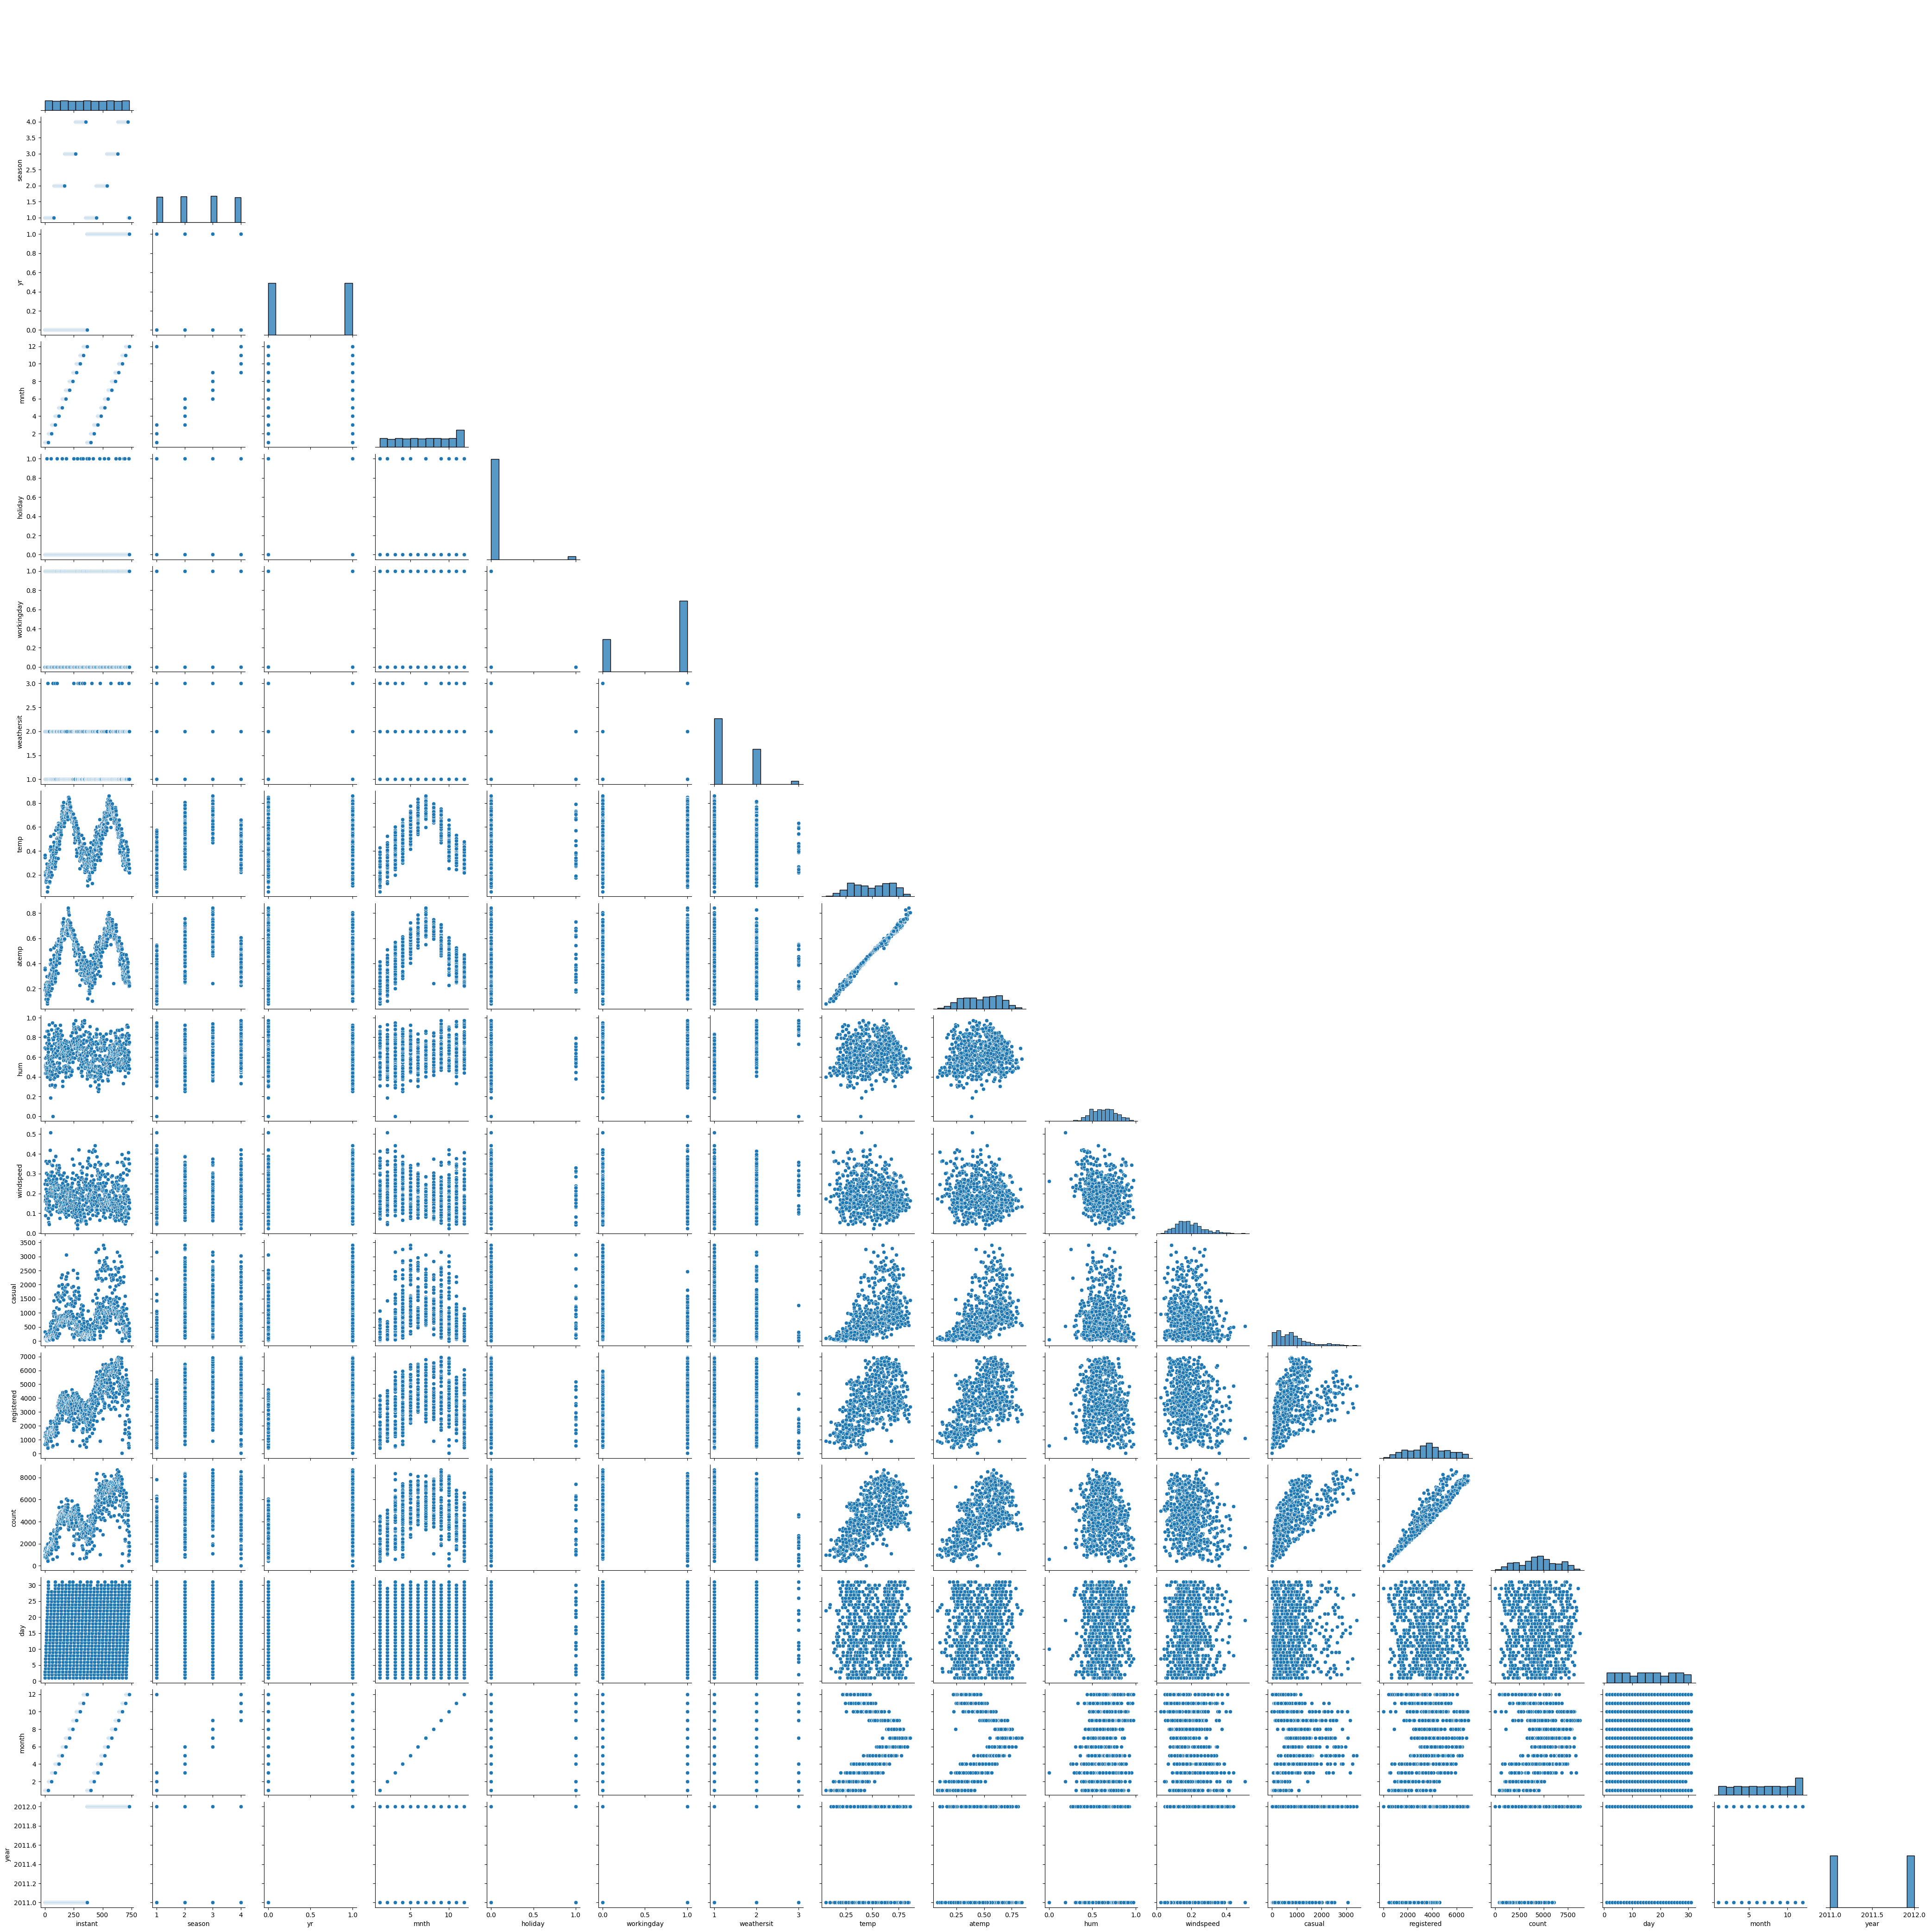

In [12]:
plt.figure(figsize=(10,10))
sns.pairplot(df,corner=True)
plt.show()

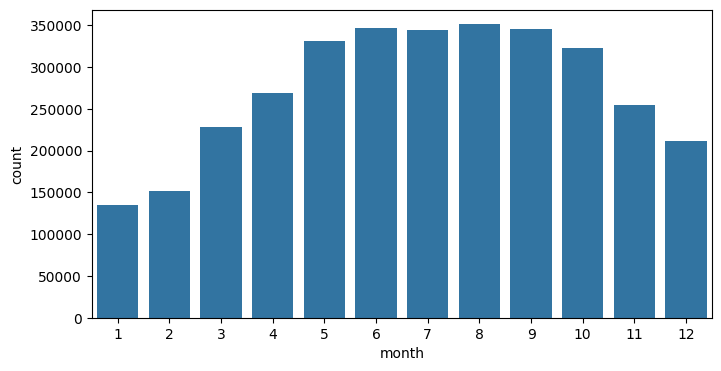

In [13]:
plt.figure(figsize=(8,4))
month = df.groupby("month").sum().reset_index()
sns.barplot(data=month,x="month",y="count")
plt.show()

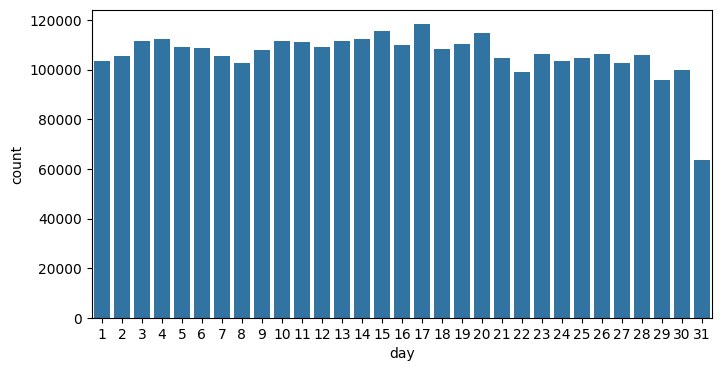

In [14]:
plt.figure(figsize=(8,4))
day = df.groupby("day").sum().reset_index()
sns.barplot(data=day,x="day",y="count")
plt.show()

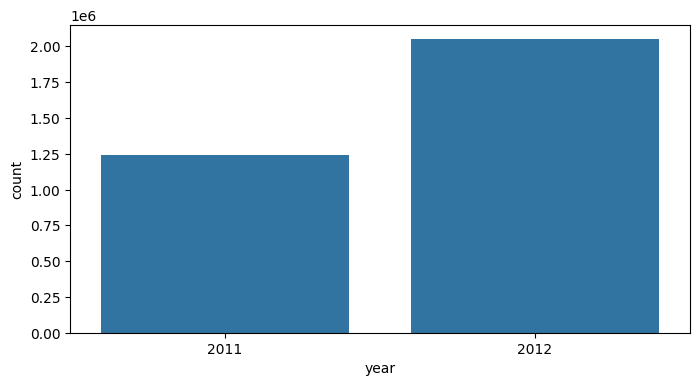

In [15]:
plt.figure(figsize=(8,4))
year = df.groupby("year").sum().reset_index()
sns.barplot(data=year,x="year",y="count")
plt.show()

In [16]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'count', 'day', 'month', 'year'],
      dtype='object')

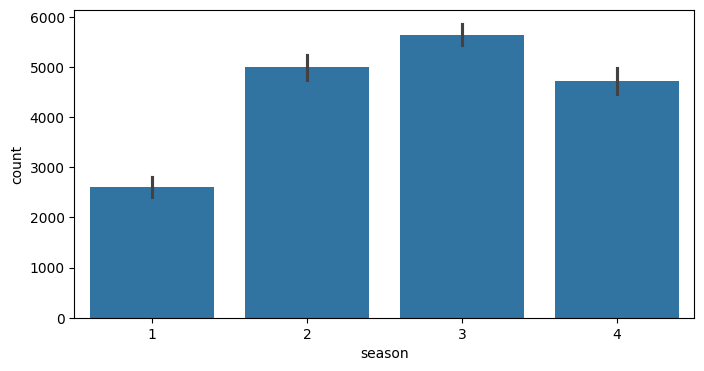

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="season",y="count")
plt.show()

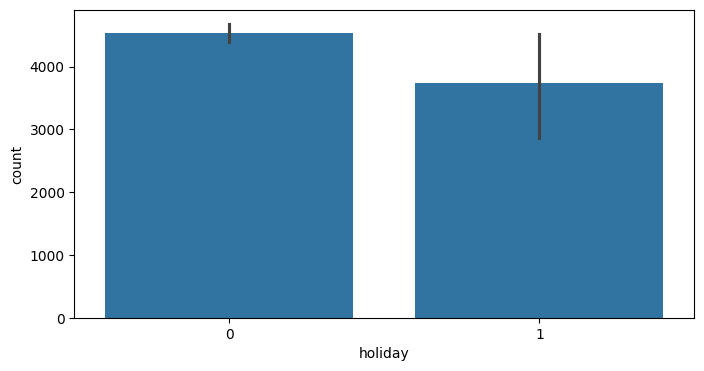

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="holiday",y="count")
plt.show()

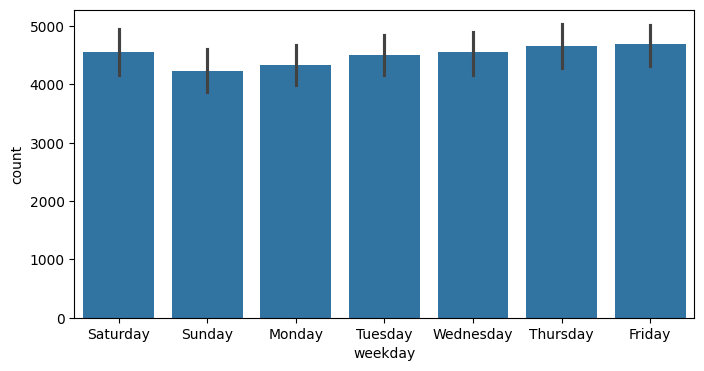

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="weekday",y="count")
plt.show()

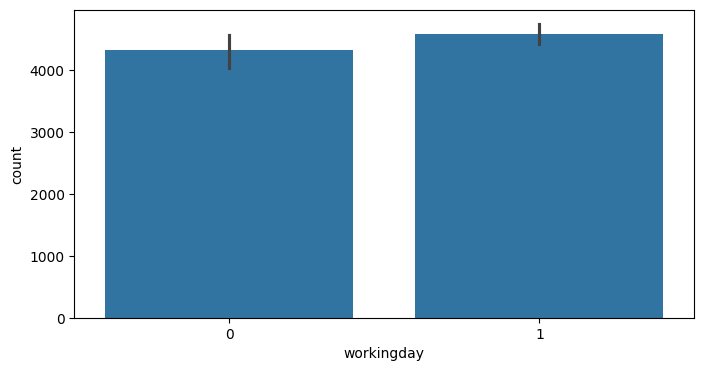

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="workingday",y="count")
plt.show()

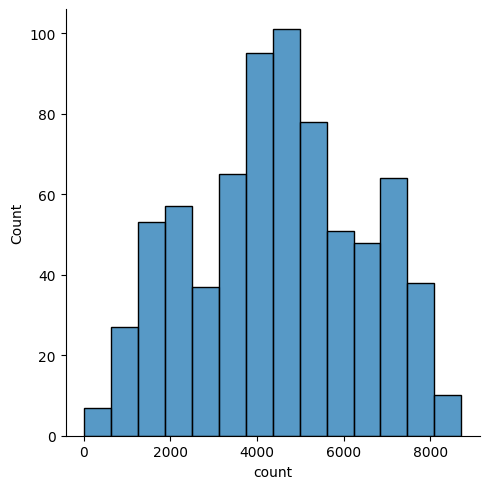

In [21]:
sns.displot(df["count"])
plt.show()

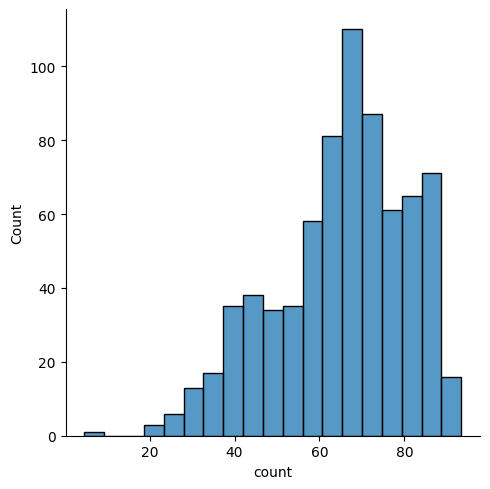

In [22]:
sns.displot(np.sqrt(df["count"]))
plt.show()

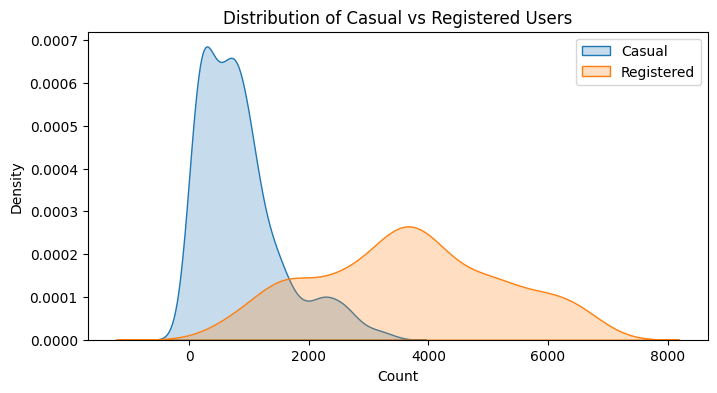

In [23]:
plt.figure(figsize=(8,4))
sns.kdeplot(df["casual"],label ="Casual",shade=True)
sns.kdeplot(df["registered"],label ="Registered",shade=True)
plt.title("Distribution of Casual vs Registered Users")
plt.xlabel("Count")
plt.ylabel("Density")
plt.legend()
plt.show()

## Handling Categorical Values

In [24]:
df["weekday"].value_counts()

weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Wednesday    104
Thursday     104
Friday       104
Name: count, dtype: int64

In [25]:
dummies = pd.get_dummies(df["weekday"],drop_first=True,dtype=int)
dummies.head(6)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
5,0,0,0,1,0,0


In [26]:
df = pd.concat([df,dummies],axis=1)
df.drop("weekday",axis=1,inplace=True)

In [27]:
df.head()

,instant,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,...,count,day,month,year,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,1,0,1,0,0,2,0.344167,0.363625,0.805833,...,985,1,1,2011,0,1,0,0,0,0
1,2,1,0,1,0,0,2,0.363478,0.353739,0.696087,...,801,2,1,2011,0,0,1,0,0,0
2,3,1,0,1,0,1,1,0.196364,0.189405,0.437273,...,1349,3,1,2011,1,0,0,0,0,0
3,4,1,0,1,0,1,1,0.200000,0.212122,0.590435,...,1562,4,1,2011,0,0,0,0,1,0
4,5,1,0,1,0,1,1,0.226957,0.229270,0.436957,...,1600,5,1,2011,0,0,0,0,0,1


In [28]:
X = df.drop("count",axis=1)
y = df["count"]

In [29]:
X.shape

(731, 22)

In [30]:
y.shape

(731,)

In [31]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (511, 22)
Shape of y_train:  (511,)
Shape of X_test:  (220, 22)
Shape of y_test:  (220,)


## Feature Scaling using Standard Scaler

In [32]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Model Building

### Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

1.0

### Ridge Regression (L2 Regularization)

In [34]:
from sklearn.linear_model import Ridge

r_model = Ridge()
r_model.fit(X_train,y_train)
r_model.score(X_test,y_test)

0.9999843457979806

### Lasso Regression (L1 Regression)

In [35]:
from sklearn.linear_model import Lasso

l_model = Lasso()
l_model.fit(X_train,y_train)
l_model.score(X_test,y_test)

0.9999995437772702

### DecisionTree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=5) 
dt_model.fit(X_train, y_train)
dt_model.score(X_test,y_test)

0.9631706270868893

### RandomForest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)

0.9900130314047152

### XGBRegressor

In [38]:
from xgboost import XGBRegressor
xg_model = XGBRegressor()
xg_model.fit(X_train,y_train)
xg_model.score(X_test,y_test)

0.9897063374519348

## Determining the suitable Model

In [39]:
models = {
    'Linear Regression': l_model,
    'Ridge Regression': r_model,
    'Lasso Regression': lr_model,
    'DecisionTree Regressor' : dt_model,
    'Random Forest': rf_model,
    'XGBRegressor' : xg_model
}
results={}
from sklearn.metrics import root_mean_squared_error, r2_score , mean_absolute_error
for name,model in models.items():
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    model_score = model.score(X_test,y_test)
    results[name] = {'RMSE': rmse, 'R²': r2, 'MAE': MAE,'Model Score' : model_score}

results_df = pd.DataFrame(results).T
results_df

,RMSE,R²,MAE,Model Score
Linear Regression,1.312286e+00,1.000000,1.036109e+00,1.000000
Ridge Regression,7.686976e+00,0.999984,5.617856e+00,0.999984
Lasso Regression,1.715538e-12,1.000000,1.308432e-12,1.000000
DecisionTree Regressor,3.728526e+02,0.963171,2.691261e+02,0.963171
Random Forest,1.941587e+02,0.990013,1.079882e+02,0.990013
XGBRegressor,1.971175e+02,0.989706,1.160850e+02,0.989706


From the table, the **Linear Regression** and **Lasso Regression** models both achieve a perfect R² score of 1.0000 and exhibit extremely low error metrics (RMSE and MAE close to zero). These results suggest these models fit the **data exceptionally well** and may be overfitting if the dataset is small or lacks diversity.

## Visualizing Model Prediction

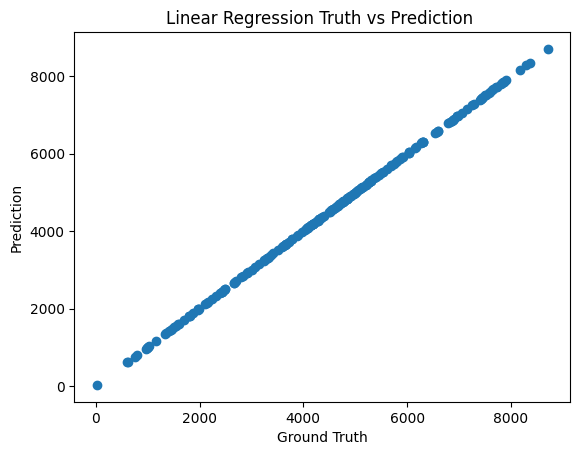

In [40]:
plt.scatter(y_test, l_model.predict(X_test))
plt.title("Linear Regression Truth vs Prediction ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

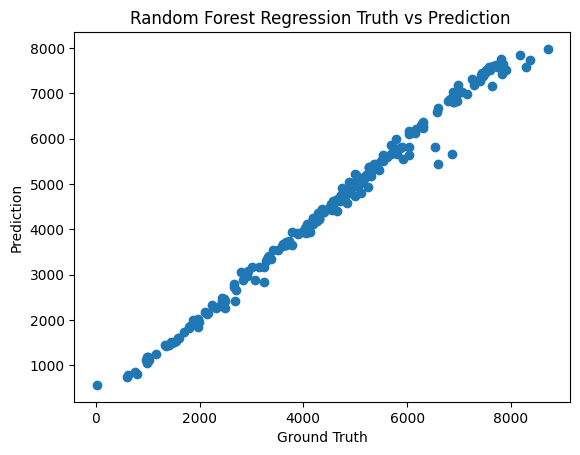

In [41]:
plt.scatter(y_test, rf_model.predict(X_test))
plt.title("Random Forest Regression Truth vs Prediction ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

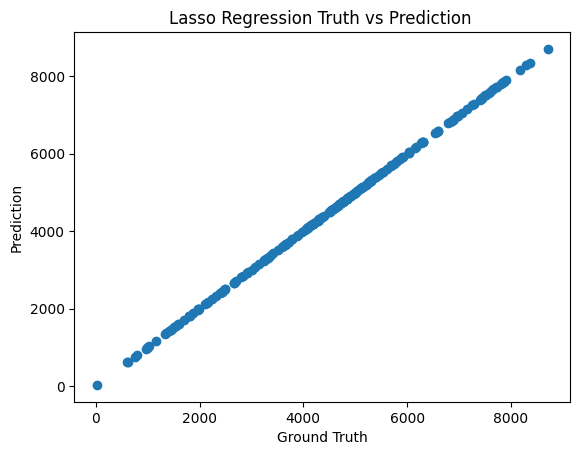

In [42]:
plt.scatter(y_test, l_model.predict(X_test))
plt.title("Lasso Regression Truth vs Prediction ")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()